In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.datasets as dsets
import torchvision.transforms as T
import torch.optim as optim

In [ ]:
# class BasicConv2d(nn.Module):
#     def __init__(self,in_channels,out_channels,**kwargs):
#         super(BasicConv2d,self).__init__()
#         self.conv = nn.Conv2d(in_channels,out_channels,bias=False,**kwargs)
#         self.bn = nn.BatchNorm2d(out_channels,eps=0.001)

#     def forward(self,x):
#         x = self.conv(x)
#         x = self.bn(x)
#         return F.relu(x,inplace=True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# class BasicBlock(nn.Module):
#     def __init__(self,in_channels,out_channels,**kwargs):
#         super(BasicBlock,self).__init__()
#         self.conv1 =nn.Conv2d(in_channels,out_channels,bias = False,**kwargs)
#         self.bn1 = nn.BatchNorm2d(out_channels,eps = 1e-05,momentum=0.1,affine=True,track_running_stats=True)
#         self.relu = nn.ReLU(inplace = True)
#         self.conv2 = nn.Conv2d(out_channels,out_channels,bias=False,**kwargs)
#         self.bn2 = nn.BatchNorm2d(out_channels,eps = 1e-05, momentum=0.1,affine=True,track_running_stats=True)

#     def forward(self,x):
#         x = self.conv1(x)
#         x = self.bn1(x)
#         x = self.relu(x)
#         x = self.conv2(x)
#         x = self.bn2(x)
#         return x

# class BasicBlock2(nn.Module):
#     def __init__(self,in_channels,out_channels,**kwargs):
#         super(BasicBlock2,self).__init__()
#         self.conv1 =nn.Conv2d(in_channels,out_channels,bias = False,**kwargs)
#         self.bn1 = nn.BatchNorm2d(out_channels,eps = 1e-05,momentum=0.1,affine=True,track_running_stats=True)
#         self.relu = nn.ReLU(inplace = True)
#         self.conv2 = nn.Conv2d(out_channels,out_channels,bias=False,**kwargs)
#         self.bn2 = nn.BatchNorm2d(out_channels,eps = 1e-05, momentum=0.1,affine=True,track_running_stats=True)
#         self.downsample = nn.Sequential(
#             nn.Conv2d(in_channels,out_channels,kernel_size=1,stride=2,bias = False),
#             nn.BatchNorm2d(out_channels,eps = 1e-05,momentum=0.1,affine=True,track_running_stats=True)
#         )
#     def forward(self,x):
#         features = self.conv1(x)
#         features = self.bn1(features)
#         features = self.relu(features)
#         features = self.conv2(features)
#         features = self.bn2(features)
#         x = self.downsample(x)
#         return features,x


class BasicBlock(nn.Module):
    def __init__(self,in_channels,out_channels,downsample):
        super(BasicBlock,self).__init__()
        self.downsample = downsample
        if self.downsample == True:
            self.conv1 = nn.Conv2d(in_channels,out_channels,kernel_size=3,stride=2,padding=1,bias=False)
        else:
            self.conv1 = nn.Conv2d(in_channels,out_channels,kernel_size=3,stride=1,padding=1,bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels,eps=1e-05,momentum=0.1,affine=True,track_running_stats=True)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(out_channels,out_channels,kernel_size=3,stride=1,padding=1,bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels,eps=1e-05,momentum = 0.1,affine = True,track_running_stats= True)

        if self.downsample == True:
            self.ds = nn.Sequential(
                nn.Conv2d(in_channels,out_channels,kernel_size=1,stride=2,bias=False),
                nn.BatchNorm2d(out_channels,eps=1e-05,momentum=0.1,affine=True,track_running_stats=True)
            )
    def forward(self,x):
        features = self.conv1(x)
        features = self.bn1(features)
        features = self.relu(features)
        features = self.conv2(features)
        features = self.bn2(features)

        if self.downsample == True:
            res = self.ds(x)
            return features + res
        else:
            return features + x

In [ ]:
class ResNet(nn.Module):
    def __init__(self):
        super(ResNet,self).__init__()
        self.conv1 = nn.Conv2d(3,64,kernel_size=7,stride=2,padding=3,bias=False)
        self.bn1 = nn.BatchNorm2d(64,eps=1e-05,momentum=0.1,affine=True,track_running_stats=True)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3,stride=2,padding=1,dilation=1,ceil_mode=False)

        self.layer1 = nn.Sequential(
            BasicBlock(64,64,False),
            BasicBlock(64,64,False),

        )
        self.layer2 = nn.Sequential(
            BasicBlock(64,128,True),
            BasicBlock(128,128,False)
        )
        self.layer3 =nn.Sequential(
            BasicBlock(128,256,True),
            BasicBlock(256,256,False)
        )
        self.layer4=nn.Sequential(
            BasicBlock(256,512,True),
            BasicBlock(512,512,False)
        )
        self.avgpool = nn.AdaptiveAvgPool2d(output_size=(1,1))
        self.fc = nn.Linear(in_features = 512,out_features=100,bias=True)
    def forward(self,x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.avgpool(x)
        x = x.view(-1,512)
        x = self.fc(x)
        return x

In [ ]:
net = ResNet()
print(net)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
transforms = T.Compose([
                        T.RandomCrop((32,32),padding=(4,4)),
                        T.RandomHorizontalFlip(p=0.5),
                        T.ToTensor(),
                        T.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225]),
                        
])

trainset = dsets.CIFAR100(root = '/content/drive/MyDrive',train=True,transform=transforms,download=True)
testset = dsets.CIFAR100(root='/content/drive/MyDrive',train=False,transform=T.Compose([         #T.RandomCrop((32,32),padding=(4,4)),
                                                                                                                    # T.RandomHorizontalFlip(p=0.5),
                                                                                                                    T.ToTensor(),
                                                                                                                    T.Normalize(mean=[0.485,0.456,0.406],
                                                                                                                                std = [0.229,0.224,0.225])
]),download=True)
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
trainLoader = torch.utils.data.DataLoader(trainset,batch_size = 128,shuffle = True)
testLoader = torch.utils.data.DataLoader(testset,batch_size =128,shuffle=False,drop_last=True)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

net = net.to(device)

In [ ]:
criterion = nn.CrossEntropyLoss().cuda()
optimizer = optim.SGD(net.parameters(),lr=0.05,momentum=0.9,weight_decay=5e-4)

In [ ]:

def check_accuracy(network,testLoader):
    class_correct = list(0. for i in range(10))
    class_total = list(0. for i in range(10))
    with torch.no_grad():
        for data in testLoader:
            images,labels = data
            images = images.cuda()
            labels = labels.cuda()
            outputs = network(images)
            #
            _,predicted = torch.max(outputs,1)
            c = (predicted == labels).squeeze()
            for i in range(128):
                label = labels[i]
                class_correct[label] +=c[i].item()
                class_total[label] +=1
    accuracy_sum = 0
    for i in range(10):
        temp = 100* class_correct[i] / class_total[i]
        accuracy_sum += temp
    return accuracy_sum / 10

In [ ]:

def show_accuracy(network,testLoader):
    class_correct = list(0. for i in range(10))
    class_total = list(0. for i in range(10))
    with torch.no_grad():
        for data in testLoader:
            images,labels = data
            images = images.cuda()
            labels = labels.cuda()
            outputs = network(images)
            #
            _,predicted = torch.max(outputs,1)
            c = (predicted == labels).squeeze()
            for i in range(128):
                label = labels[i]
                class_correct[label] +=c[i].item()
                class_total[label] +=1
    accuracy_sum = 0
    for i in range(10):
        temp = 100* class_correct[i] / class_total[i]
        print('Accuracy of %5s : %2d %%'%(classes[i],temp))
        accuracy_sum += temp
    print('Accuracy average: ',accuracy_sum / 10)

In [ ]:
epochs_accuracy_list = []
epochs_accuracy = 0
lr = 0.05
for epoch in range(200):
    running_loss = 0.0
    avg_loss=0.0
    for i,data in enumerate(trainLoader,0):
        # print("{}-th trainLoader batch!".format(i))
        #get the inputs
        inputs,labels = data
        inputs,labels = inputs.to(device),labels.to(device)
        #zero the parameter gradients
        outputs = net(inputs)
        loss = criterion(outputs,labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    acc = check_accuracy(net,testLoader)
    print("epoch: {} | Accuracy: {}".format(epoch,acc))
    epochs_accuracy_list.append(acc)
    
    if epoch % 5 == 0:
        show_accuracy(net,testLoader)

print('Finished Training')



epoch: 0 | Accuracy: 41.68733038011046
Accuracy of airplane : 47 %
Accuracy of automobile : 55 %
Accuracy of  bird :  5 %
Accuracy of   cat : 42 %
Accuracy of  deer : 26 %
Accuracy of   dog : 26 %
Accuracy of  frog : 61 %
Accuracy of horse : 50 %
Accuracy of  ship : 53 %
Accuracy of truck : 48 %
Accuracy average:  41.68733038011046
epoch: 1 | Accuracy: 48.868449013029725
epoch: 2 | Accuracy: 59.23135816525989
epoch: 3 | Accuracy: 62.427667315981424
epoch: 4 | Accuracy: 62.876562097300095
epoch: 5 | Accuracy: 66.39460419955877
Accuracy of airplane : 67 %
Accuracy of automobile : 81 %
Accuracy of  bird : 49 %
Accuracy of   cat : 47 %
Accuracy of  deer : 55 %
Accuracy of   dog : 67 %
Accuracy of  frog : 77 %
Accuracy of horse : 71 %
Accuracy of  ship : 74 %
Accuracy of truck : 73 %
Accuracy average:  66.39460419955877
epoch: 6 | Accuracy: 69.55905191537549
epoch: 7 | Accuracy: 69.61131949949035
epoch: 8 | Accuracy: 72.25003675315487
epoch: 9 | Accuracy: 71.87978646121493
epoch: 10 | Accur

In [ ]:
print(epochs_accuracy_list)

[41.68733038011046, 48.868449013029725, 59.23135816525989, 62.427667315981424, 62.876562097300095, 66.39460419955877, 69.55905191537549, 69.61131949949035, 72.25003675315487, 71.87978646121493, 72.97412973148666, 72.40313382081163, 75.47680523499321, 73.63433181987523, 75.51697683227033, 76.19758691872173, 75.22594246697034, 76.08844840271455, 76.40643289667679, 76.11538954666733, 75.5789816643215, 77.13004690302249, 75.96969273714089, 77.53183929595451, 77.18945229412626, 77.12108641490536, 77.30089520140659, 75.97908238737246, 78.14044485216228, 76.69825875547609, 77.57053638803113, 77.4800757879344, 77.08953305866554, 77.71993347894501, 77.89191696610146, 78.84531835079481, 75.2574580167873, 79.23257006614153, 77.26093678861261, 78.88422489061524, 77.73021142796334, 78.99477684597925, 79.76443616467688, 78.9434127743259, 79.44440512988935, 77.60071658815073, 78.34128643559048, 79.1133917506349, 80.71503652455579, 78.47165712680237, 77.80948108103118, 80.29521644304872, 78.2318908934

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
data = [41.68733038011046, 48.868449013029725, 59.23135816525989, 62.427667315981424, 62.876562097300095, 66.39460419955877, 69.55905191537549, 69.61131949949035, 72.25003675315487, 71.87978646121493, 72.97412973148666, 72.40313382081163, 75.47680523499321, 73.63433181987523, 75.51697683227033, 76.19758691872173, 75.22594246697034, 76.08844840271455, 76.40643289667679, 76.11538954666733, 75.5789816643215, 77.13004690302249, 75.96969273714089, 77.53183929595451, 77.18945229412626, 77.12108641490536, 77.30089520140659, 75.97908238737246, 78.14044485216228, 76.69825875547609, 77.57053638803113, 77.4800757879344, 77.08953305866554, 77.71993347894501, 77.89191696610146, 78.84531835079481, 75.2574580167873, 79.23257006614153, 77.26093678861261, 78.88422489061524, 77.73021142796334, 78.99477684597925, 79.76443616467688, 78.9434127743259, 79.44440512988935, 77.60071658815073, 78.34128643559048, 79.1133917506349, 80.71503652455579, 78.47165712680237, 77.80948108103118, 80.29521644304872, 78.231890893412, 80.29497590214781, 80.18734318401312, 79.23094458874769, 78.7331437292936, 79.27255016648236, 79.33231867119568, 78.69363265352375, 79.6550276785168, 78.86373335591095, 78.89303987420485, 79.88523692602138, 79.30502727785725, 78.47027359747693, 79.68376210028114, 80.455034998295, 79.553172553844, 79.55292065830008, 79.34201634210497, 80.51299929103197, 80.23624045610907, 80.00511634270717, 78.8536122519989, 79.39220988692605, 78.03384475143945, 80.22499632457786, 78.77435467911937, 79.11226687355936, 80.6465722122184, 79.24403560379535, 80.44545762726241, 79.58144599322209, 80.04498643372148, 79.7415047479847, 79.59362248309297, 79.28236958485793, 80.10418390678282, 79.10338097683054, 79.87020119753325, 80.54483503869575, 80.12543672429442, 79.75566930246649, 80.48333058503374, 79.3739145001851, 80.44453297050757, 80.0340238074067, 78.82309062648054, 78.64044340584023, 79.06359082638073, 80.63510687667505, 79.46466368346826, 80.07203570001961, 80.07220821927851, 80.04436579358396, 80.19429437815656, 79.90188617185454, 79.71587919280097, 78.42131851410892, 77.98352366804909, 80.34593856942793, 79.89394113546395, 80.45697349677403, 79.79321269545234, 79.614484729854, 80.44698081588822, 79.92649170978886, 79.3948582935291, 81.21578705398103, 80.20337150862538, 79.67241897093143, 80.89648978359287, 80.72556677333894, 80.85595959492979, 80.92647989285719, 79.91360240349616, 79.44146637480753, 80.08582874136701, 80.66697128786485, 80.83488514965057, 79.98568655219522, 79.06479564094238, 79.22599955448781, 80.26449423606678, 81.09670075620913, 79.4834920312159, 79.62294172180957, 79.83485650449455, 78.94467672654334, 79.50450476914946, 78.32260102044707, 79.8550072380789, 80.1249054109959, 80.29353209125571, 80.64574835984158, 80.25376244112246, 80.32383367781947, 79.8536824012834, 80.9167299232306, 80.54464452675862, 80.83621909036954, 79.98382380895477, 80.5152649674416, 79.32659108802575, 80.35190661398258, 80.18544635255815, 80.44504755865908, 79.0549064339423, 78.85011112708074, 78.14936037880481, 79.13408462969173, 79.40459620568342, 79.44396370541551, 80.22450613492913, 80.32549674369095, 78.87255997691712, 80.22464593350362, 79.65275139204347, 80.78652049578841, 79.71467570166534, 80.62604910218931, 80.15406292280908, 80.43418258118382, 80.21514651418434, 80.39338272496008, 80.8648842652539, 80.85608115962145, 79.87222755767628, 78.6316184139911, 80.19433455819504, 81.17678001183154, 80.26567847025241, 79.71578699374024, 79.90218868166764, 80.14662089817891, 81.16563559780909, 80.81662996343077, 81.5072118895498, 80.4462806571735, 80.95706992128098, 80.43789461823596, 80.80662099745348, 81.16633004463529, 79.31568031922595, 80.03529634210464, 80.73511588174647, 79.91204635267846, 80.20849672425251, 80.58725321392168]
data2 =[31.508595678691258, 35.45785104364751, 39.841294653688706, 47.97590710052046, 51.03547468061505, 55.81550362486232, 57.740235558964045, 58.78202127609465, 60.82603944750734, 63.5189487758724, 62.38003156405732, 64.54930660449013, 65.83134488077904, 68.32447179973545, 65.67873476886314, 68.02431105734833, 68.5747030539986, 68.32572284857446, 69.69795234168205, 71.04913547153383, 70.9116715973063, 70.69671502413988, 72.4328449155161, 73.86601295836371, 71.77018744517025, 73.02434709990743, 74.14424641764073, 73.24513235935095, 72.66260294895692, 72.05408896771216, 71.5213590976037, 73.29390894934106, 74.90629251587534, 71.7403091914293, 73.24468096450451, 74.26326403136343, 74.54679462323935, 74.10626439342984, 73.49314509630061, 74.28468840319488, 70.93531350465125, 74.32424842649175, 75.23710587613479, 75.88770852516345, 74.20310389162559, 74.0038164678086, 74.47464862478172, 73.35454812359953, 74.76531278079605, 74.7368866208536, 74.23690585762276, 75.44595197469215, 75.56780669749816, 74.26517065204614, 74.37735626759073, 73.76550043978689, 74.70563257955273, 75.69514846275433, 73.6638567703206, 74.41465761112096, 76.21809761031679, 74.83614535782489, 76.45774671647143, 75.75984421107923, 75.00542188590723, 75.78866037918289, 73.78502940678742, 73.40505889380536, 73.4767561075889, 75.76973163091594, 76.27861071142237, 76.85823757021747, 77.8221894658843, 73.47087620610361, 75.78667440112841, 75.70644170156935, 74.7969137776961, 75.54926180345647, 75.16978364921383, 73.8040665801127, 76.70042485244385, 75.63834707628997, 75.35688328706755, 76.38956294797279, 75.54663458513015, 75.60710555577619, 76.07903283936918, 75.81445897808652, 73.37211384551348, 76.35797652525763, 77.24070454983317, 76.65804774117015, 74.84676567651725, 76.50885991745884, 77.08923981524897, 75.93813975920672, 74.41498962764993, 74.63328336831253, 76.13706605699777, 74.53386519376866, 75.90661297583193, 76.80986204194839, 76.40802615464835, 77.87911933380488, 76.53801923812524, 75.77932232586554, 77.09967183236203, 76.69948180204936, 75.60715387799823, 76.68746605710078, 75.63727755256599, 75.87637227366523, 76.76096499147977, 75.79728485101644, 75.57712521380826, 77.24900003759919, 76.37893117331055, 76.26907137399328, 76.41886783849797, 76.49077703068141, 78.3009954832552, 76.56897071124345, 76.36005436135045, 76.8612964262043, 75.65804663562906, 76.36840737628702, 77.99987118955347, 76.74667150945012, 75.67690706358525, 76.74050549607907, 75.69716680089356, 75.43638479439193, 77.06189903462979, 76.56876968682704, 77.11724412899198, 75.75845953844652, 75.6084884614264, 77.3698234477475, 77.61935050782749, 76.3680983339305, 76.37914335170824, 78.13382368690381, 76.27744607683886, 76.29928194425986, 76.54057624710738, 77.34159690626117, 76.0369659367168, 77.29014272566486, 76.86719415894106, 77.13064374724611, 76.97075805547881, 76.52949273615377, 74.77893997784092, 77.22906071843708, 75.84782788154956, 77.32576990680647, 77.76067365661352, 76.1384621078346, 74.60765670734625, 76.80648141877595, 76.35847991930761, 77.4409864366148, 75.72555066965387, 77.62997152946983, 76.70657351892429, 76.96016256345351, 75.93057516204897, 77.50991185133712, 76.34799805123683, 76.50001167059527, 77.35830675595123, 75.09601329835995, 77.38016615983224, 76.95795554168689, 77.62235018772841, 76.55786719942456, 76.3275056331017, 77.28983311679549, 77.00987024491602, 76.04954095885986, 77.83886870198941, 77.91837752903163, 76.42896956449559, 78.33183722668161, 76.19514810137, 75.86720362593897, 76.80967209338532, 77.33145690654202, 77.38170806100763, 76.8582587540274, 77.03827720790783, 76.7897141829399, 77.00895016766785, 76.75001235360581, 76.44965199234004, 77.66952013486483, 77.95072438973446, 78.06171716758698, 76.56062659938749, 75.91395472163158]


15692.658623108468

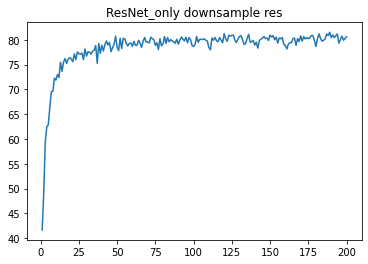

In [ ]:
plt.title("ResNet_only downsample res")
plt.plot(list(range(1,len(data)+1)),data)

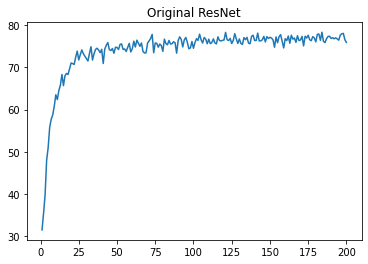

In [ ]:
plt.title("Original ResNet")
plt.plot(list(range(1,len(data2)+1)),data2)


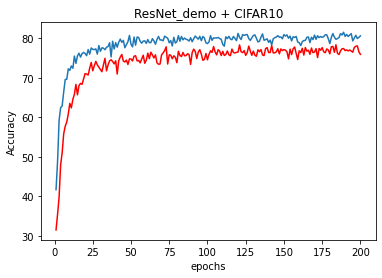

In [ ]:
plt.title("ResNet_demo + CIFAR10")
plt.plot(list(range(1,len(epochs_accuracy_list)+1)),data,list(range(1,len(data2)+1)),data2,'r')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
print("Epoch151~200 average Accuracy")
b = sum(data2[-50:])/50
print("resnet_downsample Acc: %.5f"% b)
a = sum(data[-50:])/50
print("resnet_original Acc: %.5f"%a)


Epoch151~200 average Accuracy
resnet_downsample Acc: 76.79819
resnet_original Acc: 80.15147
